<a href="https://colab.research.google.com/github/SWiwoo/PROJECTS/blob/ESAA/dacon%EC%98%81%ED%99%94%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google import colab
colab.drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('/content/drive/MyDrive/데이콘영화연습대회/movies_train.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이콘영화연습대회/submission.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘영화연습대회/movies_test.csv')

2. 탐색적 자료분석(EDA)
        1) 일부 데이터 미리보기
        title : 영화의 제목
        distributor : 배급사
        genre : 장르
        release_time : 개봉일
        time : 상영시간(분)
        screening_rat : 상영등급
        director : 감독이름
        dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
        dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
        num_staff : 스텝수
        num_actor : 주연배우수
        box_off_num : 관객수

In [5]:
# 데이터의 요약통계량 확인

pd.options.display.float_format = '{:.1f}'.format

In [6]:
train.describe() # min을 확인하여 음수값 있는지 확인 

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [7]:
# 결측치 확인 및 데이터 전처리
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [8]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [9]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


train의 dir_prev_bfnum 변수에 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다.



즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.


In [16]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [17]:
## release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.
train['release_time']=pd.to_datetime(train['release_time'])

In [12]:
# 배급사 전처리

train['distributor'] = train.distributor.str.replace("(주)", '')
test['distributor'] = test.distributor.str.replace("(주)", '')

In [13]:
import re

train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [14]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [18]:
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

In [19]:
## 장르별 영화 관객수 평균값으로 랭크 인코딩

train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬         6627.0
다큐멘터리      67172.3
서스펜스       82611.0
애니메이션     181926.7
멜로/로맨스    425968.0
미스터리      527548.2
공포        590832.5
드라마       625689.8
코미디      1193914.0
SF       1788345.7
액션       2203974.1
느와르      2263695.1
Name: box_off_num, dtype: float64

In [20]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [21]:
## 배급사별 영화 관객수 중위값 기준으로 배급사 랭크 인코딩

tr_nm_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'num_rank').sort_values(by = 'num_rank')
tr_nm_rank

,distributor,num_rank
110,인피니티엔터테인먼트,2.0
15,고구마공작소,8.0
52,사람과사람들,42.0
97,위드시네마,46.0
19,나우콘텐츠,54.0
...,...,...
113,전망좋은영화사,1214237.0
105,이십세기폭스코리아,1422844.0
56,쇼박스,2138560.0
84,영구아트무비,2541603.0


In [22]:
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]

In [23]:
tr_nm_rank

,distributor,num_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5
...,...,...
113,전망좋은영화사,143
105,이십세기폭스코리아,144
56,쇼박스,145
84,영구아트무비,146


In [24]:
train = pd.merge(train, tr_nm_rank, how = 'left')
test = pd.merge(test, tr_nm_rank, how = 'left')

In [25]:
test.fillna(0, inplace = True)

## 데이터 시각화 및 분석

In [26]:
## 월별, 분기별 가장 많이/적게 제작된 장르

# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_quarter']=train['release_time'].dt.quarter # 분기
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

train_group_mx = train.groupby(['release_year', 'release_quarter','release_month'])[['genre']].max()
train_group_mx.head(20)


genre
release_year release_quarter release_month        
2010         1               1                 코미디
                             2                 드라마
                             3              멜로/로맨스
             2               4              멜로/로맨스
                             5                 코미디
                             6                 드라마
             3               7                 드라마
                             8                  액션
                             9                 코미디
             4               10             멜로/로맨스
                             11                코미디
                             12                코미디
2011         1               1                 코미디
                             2                  액션
                             3               애니메이션
             2               4                 드라마
                             5                 코미디
                             6               애니메이션
             3               7                  액션
                             8                 코미디

In [27]:
## 적게 

train_group_mn = train.groupby(['release_quarter','release_month'])[['genre']].min()
train_group_mn

genre
release_quarter release_month      
1               1                공포
                2                SF
                3                SF
2               4                공포
                5                공포
                6                공포
3               7                SF
                8                SF
                9                공포
4               10               공포
                11               SF
                12               SF

월별, 분기별 무관하게 가장 많이 제작된 장르는 '코미디'
-> 가볍고 무난하여 인기가 높은 것으로 판단

 가장 적게 제작된 장르는 'SF'와 '공포'이다. 
-> 장르의 특성상 호불호가 갈리기 때문에 많이 흥행을 고려한 배급사에서는 적게 제작되는 것으로 판단

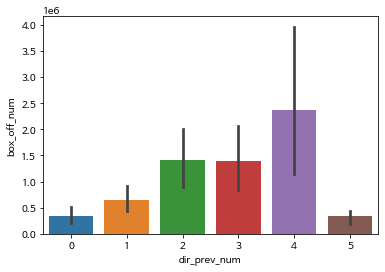

In [28]:
## 감독의 전 영화 개수와 현재 상영 영화 평균 관객 수의 관계
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_num', y='box_off_num', data=train)

# 유의미한 관계 파악하기 어려움

<Figure size 1440x1080 with 0 Axes>

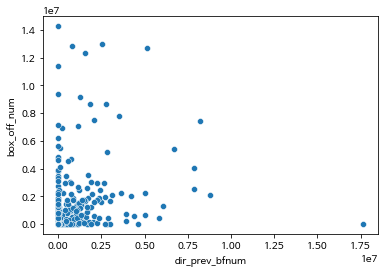

In [29]:
## 감독의 전 영화 평균 관객 수가 현재 상영 영화의 관객 수에 미치는 영향

plt.figure(figsize=(20,15))
plt.subplots()
sns.scatterplot(x='dir_prev_bfnum', y='box_off_num', data=train)

In [30]:
## 평균 관객 수 top 10 배급사

train_top5 = train[['distributor','box_off_num']].groupby('distributor').mean().sort_values('box_off_num', ascending=False).head(10)
train_top5

,box_off_num
distributor,
쇼박스,3332953.9
아이필름코퍼레이션,3117859.0
영구아트무비,2541603.0
CJ,2066505.5
NEW,1939059.9
이십세기폭스코리아,1637046.0
롯데엔터테인먼트,1238148.9
전망좋은영화사,1214237.0
머니필름,1201944.0


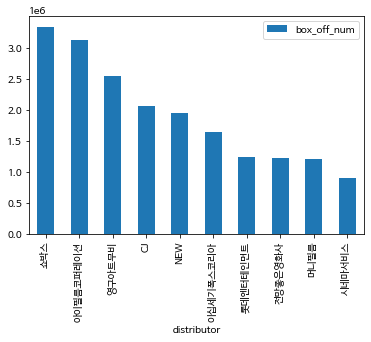

In [31]:
train_top5.plot(kind='bar')

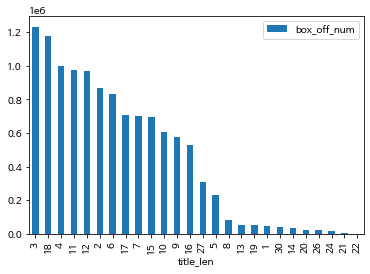

In [32]:
## 영화 제목 길이와 관객 수의 상관관계

train['title_len'] = train['title'].str.len() # 제목 길이 변수

train[['title_len','box_off_num']].groupby('title_len').mean().sort_values('box_off_num', ascending=False).plot(kind='bar')

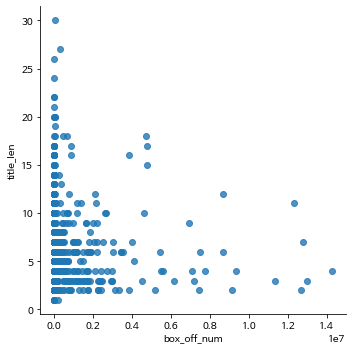

In [33]:
scatter = sns.lmplot(x='box_off_num', y='title_len', data=train, fit_reg = False) 
# 세글자 영화일 수록 흥행

In [34]:
## 본격적으로 데이터 병합후 모델링

train = pd.merge(train, tr_nm_rank, how = 'left')

test = pd.merge(test, tr_nm_rank, how = 'left')

In [35]:
test.fillna(0, inplace = True)

In [36]:
pip install catboost

In [37]:
pip install ngboost

In [38]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor

## 모델링 데이터 구성
    타겟 값인 관객수를 로그변환
    상영등급은 더미 변수
    출연 배우 수는 로그변환


In [39]:
X = train[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
y = np.log1p(train.box_off_num)


In [40]:
X = pd.get_dummies(columns = ['screening_rat'], data = X)

In [41]:
X['num_actor'] = np.log1p(X['num_actor'])

In [42]:
target = test[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]

In [43]:
target = pd.get_dummies(columns = ['screening_rat'], data = target)

In [44]:
target['num_actor'] = np.log1p(target['num_actor'])

In [45]:
## 10Fold로 교차검증
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

5가지 모델 사용


1) GradientBoostingRegressor

In [46]:
gbm = GradientBoostingRegressor(random_state = 42)

In [47]:
rmse_list = []
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 10)

In [48]:
np.mean(rmse_list)

1174378.9787164854

2) NGBRegressor

In [49]:
ngb = NGBRegressor(random_state = 518)

In [50]:
rmse_list = []
ngb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    ngb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in ngb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in ngb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    ngb_pred += (sub_pred / 10)

[iter 0] loss=2.6200 val_loss=0.0000 scale=1.0000 norm=2.9523
[iter 100] loss=1.9566 val_loss=0.0000 scale=2.0000 norm=2.7106
[iter 200] loss=1.5812 val_loss=0.0000 scale=2.0000 norm=2.1869
[iter 300] loss=1.4423 val_loss=0.0000 scale=2.0000 norm=2.0889
[iter 400] loss=1.3728 val_loss=0.0000 scale=1.0000 norm=1.0177
[iter 0] loss=1.4083 val_loss=0.0000 scale=1.0000 norm=1.0758
[iter 100] loss=1.3277 val_loss=0.0000 scale=2.0000 norm=2.0187
[iter 200] loss=1.2852 val_loss=0.0000 scale=1.0000 norm=0.9857
[iter 300] loss=1.2444 val_loss=0.0000 scale=1.0000 norm=0.9642
[iter 400] loss=1.2138 val_loss=0.0000 scale=0.5000 norm=0.4748
[iter 0] loss=1.2145 val_loss=0.0000 scale=1.0000 norm=0.9547
[iter 100] loss=1.1615 val_loss=0.0000 scale=1.0000 norm=0.9176
[iter 200] loss=1.1484 val_loss=0.0000 scale=0.2500 norm=0.2274
[iter 300] loss=1.1389 val_loss=0.0000 scale=0.5000 norm=0.4516
[iter 400] loss=1.1370 val_loss=0.0000 scale=0.0312 norm=0.0282
[iter 0] loss=1.1687 val_loss=0.0000 scale=1.0

In [52]:
np.mean(rmse_list)

1319488.3448624564

3) LGBMRegressor

In [51]:
lgbm = LGBMRegressor(random_state = 518)

In [53]:
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

In [54]:
np.mean(rmse_list)

1213815.0440528719

4) XGBRegressor

In [55]:
xgb = XGBRegressor(random_state = 518)

In [56]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [57]:
np.mean(rmse_list)

1002219.3081045212

5) CatBoostRegressor

In [58]:
cat = CatBoostRegressor(random_state = 518, silent = True)

In [59]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in cat.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

In [60]:
np.mean(rmse_list)

1075600.9209088846

6) RandomForestRegressor

In [61]:
rf = RandomForestRegressor(random_state = 518)

In [62]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)

np.mean(rmse_list)

873671.7029559091

최종 예측 결과 블렌딩

In [63]:
submission['box_off_num'] = (xgb_pred + cat_pred + lgb_pred + rf_pred + gb_pred + ngb_pred) / 6

In [64]:
submission.sort_values(by = 'box_off_num')

,title,box_off_num
130,댄서김의 은밀한 교수법,12.5
39,REC 알이씨,15.0
139,화려한 외출,20.3
173,옹녀뎐,21.9
65,엄마는 창녀다,27.8
...,...,...
135,용의자,4104398.1
229,베테랑,4312486.9
142,박수건달,4983717.1
179,군도: 민란의 시대,6283717.3
